In [2]:
# IMPORT DEPENDENCIES
# FOR DATA
import pandas as pd
import os
import csv
import math
import numpy as np
import time
import datetime
# import requests
# import datefinder

# # FOR SQL LITE
# from sqlalchemy import create_engine
# from datetime import date

# # FOR PLOTTING
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8

# FOR MODELING
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# FOR KNN AND OTHER MODELING
from scipy.optimize import curve_fit
# from splinter import Browser
# from bs4 import BeautifulSoup as BS
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# # FOR TF MODELS
# import keras.models
# import keras.layers
# import keras.utils
# from keras.models import Sequential
# from keras.layers import Dense, Dropout


In [27]:
idahoCounties = ['Ada', 'Adams', 'Bannock', 'Bear Lake', 'Benewah', 'Bingham', 'Blaine', 'Boise', 'Bonner', 'Bonneville', 'Boundary','Butte', 
 'Camas', 'Canyon', 'Caribou', 'Cassia', 'Clark', 'Clearwater', 'Custer', 'Elmore', 'Franklin', 'Fremont', 'Gem', 'Gooding', 
 'Idaho', 'Jefferson', 'Jerome' 'Kootenai', 'Latah', 'Lemhi', 'Lewis', 'Lincoln', 'Madison', 'Minidoka','Nez Perce', 
 'Oneida', 'Owyhee', 'Payette', 'Power', 'Shoshone', 'Teton', 'Twin Falls', 'Valley', 'Washington']
        

notIdahoCounties = ['Baker', 'Beaverhead', 'Box Elder', 'Elko', 'Gallatin', 'Malheur', 'Mineral', 'Missoula', 'Ravalli', 'Sanders']

# IMPORT DATA

In [3]:
# File path for the CSV Files
idahoFireWeatherDrought = os.path.join("..", "Data", "fires_Idaho_2000_2015_drought_weather.csv")

# Open the CSV Files, Convert to a Dataframe, and Save as a Variable
idaho_Fire_Weather_Drought_df = pd.read_csv(idahoFireWeatherDrought)
# fires_Idaho_df = pd.read_csv(idahoFires, dtype={"LOCAL_INCIDENT_ID": 'string', "FIRE_NAME": 'string'})

In [28]:
# CONVERT DATE TO DATETIME FORMAT
idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'])
idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'])

# CREATE COLUMNS WE NEED
idaho_Fire_Weather_Drought_df['FIRE_DAYS'] = (((idaho_Fire_Weather_Drought_df['CONT_DOY']) + 1) - idaho_Fire_Weather_Drought_df['DISCOVERY_DOY'])
idaho_Fire_Weather_Drought_df['COUNTY_NAME'] = (idaho_Fire_Weather_Drought_df['FIPS_NAME'])
# Create month column
idaho_Fire_Weather_Drought_df['DISCOVERY_MONTH_CONVERTED']=idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'].apply(lambda x: int(x.strftime('%m')))

# FILTER ROWS FOR FIRES IN COUNTIES OUTSIDE IDAHO
idaho_Fire_Weather_Drought_df = idaho_Fire_Weather_Drought_df[idaho_Fire_Weather_Drought_df['NAME'].isin(idahoCounties)]

# View the Data in the Dataframe
# print(idaho_Fire_Weather_df.keys())
idaho_Fire_Weather_Drought_df

,Unnamed: 0,OBJECTID,Shape,Join_Count,TARGET_FID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,...,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4,FIRE_DAYS,COUNTY_NAME,DISCOVERY_MONTH_CONVERTED
0,0,152,Point,1,152,155,FS-1419238,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,77.00,69.08,69.98,71.06,1,Fremont,1
1,1,169,Point,1,169,172,FS-1419278,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,64.04,62.06,69.08,66.92,1,Bannock,1
2,2,173,Point,1,173,176,FS-1419291,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,69.08,66.92,64.04,64.94,1,Bannock,1
3,3,174,Point,1,174,177,FS-1419292,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,69.08,66.92,64.04,64.94,1,Bannock,1
4,4,175,Point,1,175,178,FS-1419293,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.8,64.94,68.00,71.96,71.96,1,Bannock,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15481,15481,1847545,Point,1,1847545,300274025,SFO-2015IDIDL6102015028,NONFED,ST-NASF,ST/C&L,...,0.0,0.0,0.0,64.58,60.80,59.90,60.62,2,Boise,1
15483,15483,1847684,Point,1,1847684,300274204,SFO-2015IDIDL2102015023,NONFED,ST-NASF,ST/C&L,...,0.0,0.9,0.0,58.28,60.08,66.74,59.36,2,Boundary,1
15484,15484,1847710,Point,1,1847710,300274236,SFO-2015IDIDL2102015021,NONFED,ST-NASF,ST/C&L,...,0.9,0.0,0.0,60.08,66.74,59.36,50.00,1,Boundary,1
15485,15485,1847762,Point,1,1847762,300274306,SFO-2015IDIDL9802015030,NONFED,ST-NASF,ST/C&L,...,0.0,0.0,0.0,67.28,58.46,61.52,63.68,1,Valley,1


In [5]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [29]:
# Get Avg for values
Day1_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].mean()
Day2_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].mean()
Day3_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].mean()
Day4_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].mean()
Day1_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].mean()
Day2_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].mean()
Day3_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].mean()
Day4_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].mean()

# Use Avg values to fill any null values
idaho_Fire_Weather_Drought_df['DAY_PRCP_1'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].fillna(Day1_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_2'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].fillna(Day2_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_3'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].fillna(Day3_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_4'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].fillna(Day4_prcp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].fillna(Day1_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].fillna(Day2_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].fillna(Day3_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].fillna(Day4_temp)

In [30]:
# I'm intentionally not looking at "LoanAmount", because I don't want to print out every possible loan value
contains_null = ['LATITUDE', 'LONGITUDE', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
                                   'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']

# for col in contains_null:
#     print(f"List of unique labels for {col}:::{set(idaho_Fire_Weather_Drought_df[col])}")

In [8]:
# # Get dummy variables for nominal property column
# # idaho_Fire_Weather_df = pd.get_dummies(idaho_Fire_Weather_df, columns=["FIRE_SIZE_CLASS"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["CITY"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["NAME"])

# # FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# # # replace values in each column according to the dictionaries above
# # clean_fires_Idaho_2000_2015_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
# idaho_Fire_Weather_Drought_df.isnull().sum()

# MODELING

## CREATING A KNN NETWORK MODEL

In [9]:
# idaho_Fire_Weather_Drought_df

In [10]:
Corr_df = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
                                   'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]
Corr_df['FIRE_SIZE_CLASS']= Corr_df['FIRE_SIZE_CLASS'].astype('category').cat.codes

Corr_df.corr()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,FIRE_SIZE_CLASS,AVE_SIZE12,CROP_ACR12,None,D0,D1,D2,D3,D4,DAY_PRCP_1,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4
FIRE_SIZE_CLASS,1.000000,0.160932,0.157311,-0.065962,0.066057,0.088865,0.034377,0.006644,-0.003103,-0.029500,-0.054438,-0.074597,-0.076990,0.012327,0.011437,0.043590,0.078059
AVE_SIZE12,0.160932,1.000000,0.571380,-0.137073,0.131352,0.135573,0.091559,0.083473,0.046812,-0.006052,-0.018983,-0.006477,-0.013977,0.036630,0.044597,0.060058,0.059310
CROP_ACR12,0.157311,0.571380,1.000000,-0.135187,0.135277,0.141688,0.108183,0.132088,0.102180,-0.004251,-0.023994,-0.031849,-0.012188,-0.050913,-0.056902,-0.044874,-0.022190
None,-0.065962,-0.137073,-0.135187,1.000000,-0.995751,-0.723732,-0.472200,-0.248983,-0.087706,0.008517,-0.011360,-0.008045,0.009782,0.025653,0.039470,0.034612,0.032694
D0,0.066057,0.131352,0.135277,-0.995751,1.000000,0.726378,0.473902,0.249879,0.088022,-0.008279,0.010693,0.007879,-0.008942,-0.024527,-0.037737,-0.033154,-0.031903
D1,0.088865,0.135573,0.141688,-0.723732,0.726378,1.000000,0.703901,0.373141,0.131763,0.006715,0.008598,-0.006008,-0.033356,-0.023422,-0.035005,-0.027347,-0.015709
D2,0.034377,0.091559,0.108183,-0.472200,0.473902,0.703901,1.000000,0.587261,0.211572,0.022861,0.010859,0.010129,-0.023274,-0.079071,-0.090207,-0.092614,-0.089342
D3,0.006644,0.083473,0.132088,-0.248983,0.249879,0.373141,0.587261,1.000000,0.425661,-0.004332,-0.012214,-0.020633,-0.018498,-0.120081,-0.125164,-0.131088,-0.120926
D4,-0.003103,0.046812,0.102180,-0.087706,0.088022,0.131763,0.211572,0.425661,1.000000,0.001443,0.001041,0.001154,-0.001889,-0.053431,-0.074054,-0.073701,-0.069552
DAY_PRCP_1,-0.029500,-0.006052,-0.004251,0.008517,-0.008279,0.006715,0.022861,-0.004332,0.001443,1.000000,0.135768,0.050506,0.010305,-0.114486,-0.149527,-0.121413,-0.091950


In [11]:
# INVESTIGATING INPUTS
# Possible X columns
New_df = idaho_Fire_Weather_Drought_df[['DISCOVERY_DATE_CONVERTED', 'LATITUDE', 'LONGITUDE', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
                                   'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]
# New_df['FIRE_SIZE_CLASS']= New_df['FIRE_SIZE_CLASS'].astype('category').cat.codes
# New_df['AVE_FAM_SZ']= New_df['AVE_FAM_SZ'].apply(lambda x: x//1)

from sklearn.decomposition import PCA
pca = PCA(n_components=21)


New_df = pd.get_dummies(New_df, columns=['NAME'])
New_df2=New_df

# New_df = New_df.drop(['FIRE_SIZE_CLASS'], axis=1)
# X.head()
# print(X.keys())
# X = X.values.reshape(-1, 72)

X_Array = New_df.to_numpy()
pca.fit(X_Array)
# print(pca.singular_values_)
x = pca.transform(X_Array)
x
# print(X.shape)
# type(X)
# X

array([[ 9.17570773e+04, -9.43248006e+01, -2.48191169e+02, ...,
         5.29071811e-01,  2.66973125e+00,  1.48888701e-01],
       [ 4.80492609e+04, -3.42688125e+02, -7.48059981e+01, ...,
         1.46903747e-01,  1.34806496e+00, -4.20690213e-02],
       [ 4.80492608e+04, -3.42685372e+02, -7.48013907e+01, ...,
         2.12168138e-01,  1.56611925e+00, -3.52371022e-02],
       ...,
       [-6.93223911e+04, -9.44683270e+01, -1.76611155e+02, ...,
        -9.59153225e-01, -2.32957563e-01,  3.54404586e-01],
       [-1.07267941e+05,  3.31724070e+02, -3.60559961e+01, ...,
        -1.99059658e+00, -1.19858522e+00, -1.23056065e-01],
       [-6.93223910e+04, -9.45085358e+01, -1.76687508e+02, ...,
        -1.20793710e+00, -3.75778481e-01,  3.16032286e-01]])

In [46]:
# CREATE X VALUES
# # Create X Input by keeping columns from df
# X = idaho_Fire_Weather_Drought_df[['STAT_CAUSE_DESCR', 'DISCOVERY_MONTH_CONVERTED', 'DISCOVERY_DATE_CONVERTED', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 
#                                    'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 
#                                    'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# # Either Or
# X = X.drop(['STAT_CAUSE_DESCR', 'DISCOVERY_DATE_CONVERTED', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'None'], axis=1)
# # X = pd.get_dummies(X, columns=['STAT_CAUSE_DESCR'])
# X = pd.get_dummies(X, columns=['NAME'])

# # # ADD IDAHO COLUMNS THAT HAVE NO FIRE INFO (FOR COMPLETENESS)
# X['NAME_Bear Lake'] = 0
# X['NAME_Jerome'] = 0
# X['NAME_Kootenai'] = 0


# # Interim views
# # # X
# # # X.dtypes
# # # X.columns

# # # seed values for reshape and no of ML runs (epochs)
# NoOfCols = 58
# NoOfRuns = 2000

# # # Reshape X from df to array v1
# X = X.values.reshape(-1, NoOfCols)

# # # Reshape X from df to array v2
# # X = X.to_numpy()

# # # View output
# print(f"Shape of X Input is {X.shape}")
# print(f"Type of X input is {type(X)}")
# X
# --------------------------------------------------------
# Create X Input by keeping columns from df
X = idaho_Fire_Weather_Drought_df[['LATITUDE', 'LONGITUDE', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
                                   'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# X by drop
# X = idaho_Fire_Weather_df.drop(['FIRE_SIZE_CLASS', 'DISCOVERY_DATE_CONVERTED'], axis=1)

# Get dummies for names (if using the county 'NAME' column)
# X = pd.get_dummies(X, columns=['NAME'])

print(X.keys())
X = X.values.reshape(-1, 20)

# X = X.to_numpy()

print(X.shape)
type(X)
X

Index(['LATITUDE', 'LONGITUDE', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12',
       'CROP_ACR12', 'None', 'D0', 'D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1',
       'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1',
       'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4'],
      dtype='object')
(14902, 20)


array([[  44.48861111, -111.25611111,    3.32      , ...,   69.08      ,
          69.98      ,   71.06      ],
       [  42.73638889, -112.38444444,    3.17      , ...,   62.06      ,
          69.08      ,   66.92      ],
       [  42.83972222, -112.17666667,    3.17      , ...,   66.92      ,
          64.04      ,   64.94      ],
       ...,
       [  48.58927051, -116.3929417 ,    3.        , ...,   66.74      ,
          59.36      ,   50.        ],
       [  44.49186207, -116.0888318 ,    2.71      , ...,   58.46      ,
          61.52      ,   63.68      ],
       [  48.63620768, -116.4743172 ,    3.        , ...,   51.8       ,
          53.06      ,   55.4       ]])

In [47]:
# CREATE y VALUES
y = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS']]
# y = idaho_Fire_Weather_Drought_df[['STAT_CAUSE_DESCR', 'FIRE_SIZE_CLASS']]

# y = y.values.reshape(-1, 2)

# print(y.shape)
# # type(y)
# y

# LABEL ENCODE Y
# Import required module
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()

# Create an object of the label encoder class
labelencoder = LabelEncoder()

# apply "le.fit_transform"
old_y = y.apply(le.fit_transform)
y = old_y

# # Change the shape of y v1
new_y = np.array(old_y)
y = new_y.reshape(-1, 1) 

y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [48]:
# numpy.arange(10000)

In [49]:
# Split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
# # Scale your data
# from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
# # y_scaler = StandardScaler().fit(y_train)

# # Create variables to hold the scaled train & test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# # y_train_scaled = y_scaler.transform(y_train)
# # y_test_scaled = y_scaler.transform(y_test)

In [51]:
### Encode the categorical target variable to the necessary format for the model
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### Create 2 neural network with 1 hidden layer and 2 hidden layers

In [52]:
# Inputs
print(X_train.shape)
print(X_train_scaled.shape)
print(X_test.shape)
print(X_test_scaled.shape)

(11176, 20)
(11176, 20)
(3726, 20)
(3726, 20)


In [53]:
# Inputs
print(y_train_categorical.shape)
print(y_test_categorical.shape)

(11176, 7)
(3726, 7)


In [54]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []

k_range = range(1, 20, 2)
opts_range = []

for k in k_range:
    # create the classifier for each value of K
    knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=k, p=1,
                     weights='uniform')
    knn.fit(X_train, y_train_categorical)
    
    #Score with both test and train data
    train_score = knn.score(X_train, y_train_categorical)
    test_score = knn.score(X_test, y_test_categorical)
    
    #append the scores to our list of scores
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}: Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1: Train/Test Score: 0.999/0.457
k: 3: Train/Test Score: 0.629/0.438
k: 5: Train/Test Score: 0.546/0.432
k: 7: Train/Test Score: 0.506/0.427
k: 9: Train/Test Score: 0.484/0.419
k: 11: Train/Test Score: 0.470/0.413
k: 13: Train/Test Score: 0.458/0.413
k: 15: Train/Test Score: 0.447/0.410
k: 17: Train/Test Score: 0.440/0.407
k: 19: Train/Test Score: 0.438/0.409


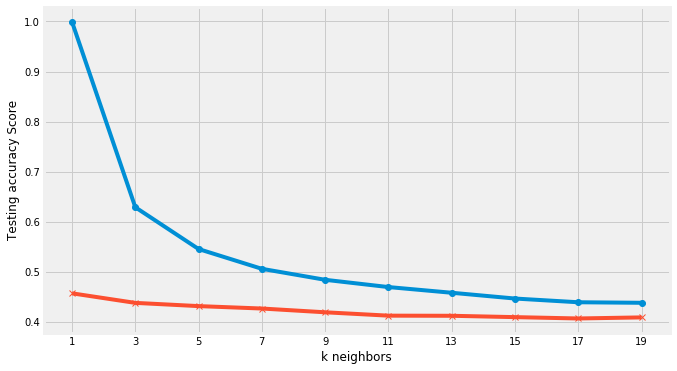

In [55]:
plt.figure(figsize=(10,6))

plt.plot(k_range, train_scores, marker='o')

plt.plot(k_range, test_scores, marker="x")

plt.xticks(k_range)

plt.xlabel("k neighbors")

plt.ylabel("Testing accuracy Score")

plt.show()

In [56]:

knn_model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
              }

grid = GridSearchCV(knn_model, param_grid, verbose=-1, scoring='f1_micro', cv = 3)
# 'average' : [None, 'micro', 'macro', 'weighted', 'samples']
# f1_score(y_true, y_pred, average='weighted')

In [57]:
# grid.fit(X_train, y_train_categorical)

In [58]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
grid.best_score_

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Model02_knnModel.sav'
joblib.dump(knn_model, filename)

In [ ]:
fire_model_v1, fire_model_v1 = fire_model_v1.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

fire_model_v2, fire_model_v2 = fire_model_v2.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")